# <b> Análise do Conjunto de Dados Job_Skills (Kaggle)

## <b> Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import re
import string
import string
import nltk
from nltk.corpus import stopwords
from collections import Counter

## <b> Carregando o dataset

In [2]:
job = pd.read_excel('dataset/job_skills.xlsx', index_col=0)

## <b> Visualizando informações sobre os dados

In [3]:
# Primeiras linhas
job.head()

,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
Company,,,,,,
Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [58]:
job.isnull().sum()

Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum Qualifications      14
Preferred Qualifications    14
dtype: int64

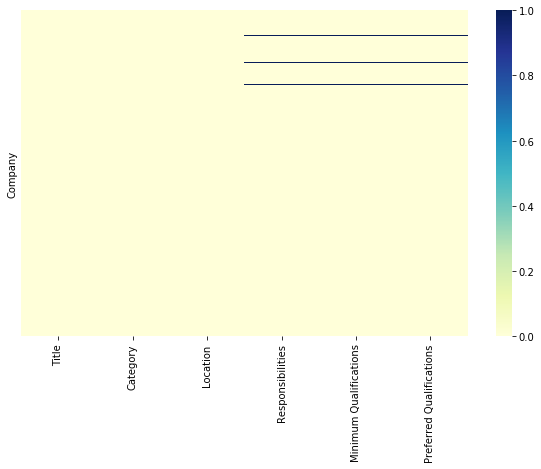

In [59]:
# Verificando através de um mapa de calor a existência de nulos
plt.figure(figsize = (10,6))
sea.heatmap(job.isnull(),yticklabels=False,cbar=True,cmap='YlGnBu')

In [4]:
# Removendo as linhas que possuem os valores nulos
job.dropna(how = 'any', inplace = True, axis = "rows")

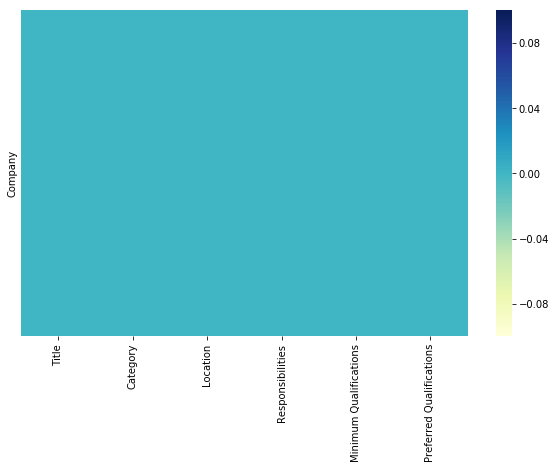

In [5]:
# Visualizando o mapa de calor após a exclusão dos nulos
plt.figure(figsize = (10,6))
sea.heatmap(job.isnull(),yticklabels=False,cbar=True,cmap='YlGnBu')

In [6]:
# Verificando a quantidade de linhas e colunas do dataset
job.shape

(1235, 6)

## <b>Quais são os países com mais vagas anunciadas pela Google? Como você construiria um gráfico que demonstre o resultado da contagem

In [7]:
# Buscando a informação dos países da coluna Location (última posição das informações)
p =job['Location'].str.split(", ").str[-1]

In [8]:
# Contabilizando as vagas/país pelo índice Google
quantPais = p['Google'].value_counts()

In [9]:
# Organizando os dados em um dataframe
s = pd.Series(quantPais)
pais = pd.DataFrame({'País':s.index, 'Vagas':s.values})
pais.head(16)

,País,Vagas
0,United States,607
1,Ireland,87
2,United Kingdom,61
3,Germany,53
4,Singapore,39
5,China,38
6,Australia,35
7,Japan,31
8,Taiwan,30
9,India,27


In [11]:
# Selecionando os dados que serão plotados (com vagas acima de 10)
pais_y = pais.iloc[0:16,]

Text(0, 0.5, 'Países')

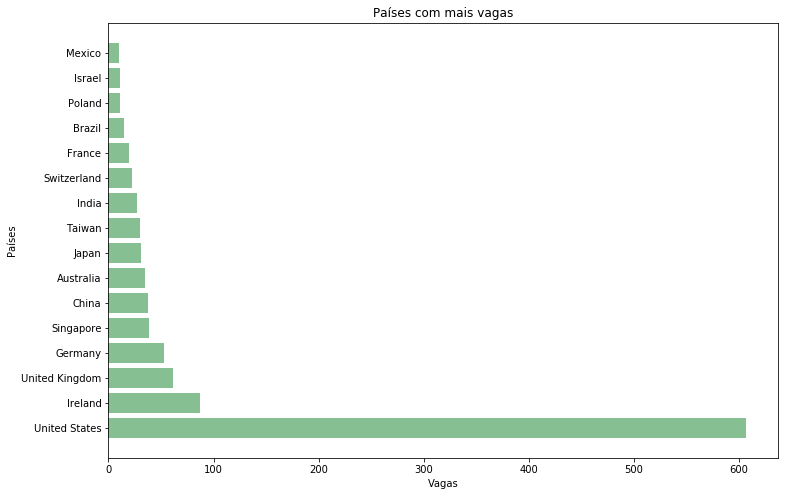

In [12]:
# Gráfico de barras horizontais para uma melhor visualização 
# Demonstrando o gráfico após organizar os dados e selecionar os países com maior número de vagas anunciadas
plt.figure(figsize = (12,8))
plt.barh(y="País", width = "Vagas", data=pais_y, align = 'center', color='#86bf91')
plt.title("Países com mais vagas")
plt.xlabel('Vagas')
plt.ylabel('Países')

## <b>Qual o número de vagas oferecidas para o Brasil?

In [101]:
# Buscando o registro onde o país é igual a 'Brazil' utilizando o dataframe criado acima
brazil = pais[pais['País'] == 'Brazil']
brazil

,País,Vagas
12,Brazil,15


## <b> Funções para análise de texto

In [20]:
# Remove Pontuação e as StopWords
def FormataTexto(msg):    
    # Retira a Pontuação
    semPont = [char for char in msg if char not in string.punctuation] 
    # Junta novamente as palavras
    semPont = "".join(semPont) 
    # Remove as stopwords
    return [word for word in semPont.split() if word.lower() not in stopwords.words('english')]    

In [21]:
# Verifica a frequencia das palavras no texto (o most_common analisa o texto e conta os elementos mais comuns)
def Frequencia(texto):
    return Counter(texto).most_common()

In [22]:
# Busca apenas as informações do Google
google = job.loc[pd.CategoricalIndex(["Google"])]
google.head(2)

,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
Company,,,,,,
Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."


## <b> Quais são as qualificações mínimas que o google mais exige?

In [23]:
# Busca as informações da coluna "Minimum Qualifications" e as transforma em String
googleMQ = google['Minimum Qualifications'] .to_string()

In [24]:
# Envia o texto completo para a função que remove pontuação e stopwords
mensagemMQ = FormataTexto(googleMQ)

In [25]:
# Envia o texto formatado para a função que contabiliza a frequência da ocorrência das palavras
freqMsgMQ = Frequencia(mensagemMQ)

In [26]:
# Organiza os dados em um dataframe para melhor visualização e plotagem
dataMQ = pd.DataFrame(freqMsgMQ, columns=["Termo", "Ocorrência"])
dataMQ.head(20)

,Termo,Ocorrência
0,Google,1212
1,degree,968
2,BABS,804
3,equivalent,625
4,practical,588
5,experienc,499
6,Science,170
7,Computer,169
8,Bachelors,147
9,related,96


In [27]:
# Criando uma lista para preencer o dataset 
m = ['Bachelors','Master','BA/BS or Experience', 'MBA', 'Years of Experience']

In [63]:
# Buscando nas qualificações mínimas a ocorrência dessas palavras
m_list= [google['Minimum Qualifications'].str.contains("Bachelor's").sum(),
            google['Minimum Qualifications'].str.contains("Master's").sum(),
            google['Minimum Qualifications'].str.contains("BA/BS degree or equivalent practical experience").sum(),
            google['Minimum Qualifications'].str.contains("MBA").sum(),
            google['Minimum Qualifications'].str.contains("years of experience").sum()
         
           ]
m_list

[148, 49, 502, 71, 353]

In [102]:
# Organizando os arquivos em um dataset para melhor visualizar e plotar
minimum = pd.DataFrame(m, columns = ['Qualificação Mínima'])
minimum['Ocorrências'] = m_list

In [103]:
# Visualizando o resultado
minimum

,Qualificação Mínima,Ocorrências
0,Bachelors,148
1,Master,49
2,BA/BS or Experience,502
3,MBA,71
4,Years of Experience,353


Text(0, 0.5, 'Ocorrências')

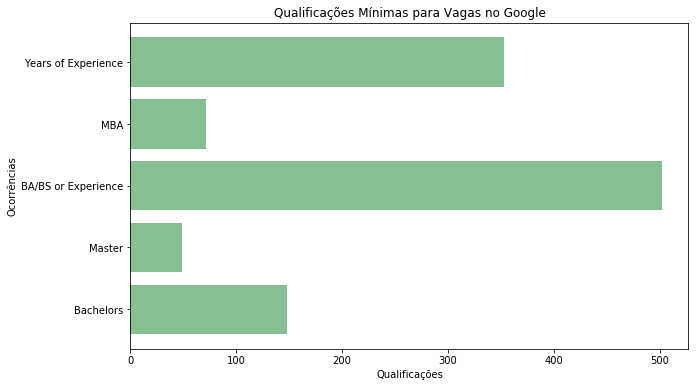

In [104]:
# Plotagem das informações
plt.figure(figsize = (10,6))
plt.barh(y="Qualificação Mínima", width ="Ocorrências" ,  data=minimum, color='#86bf91')
plt.title("Qualificações Mínimas para Vagas no Google")
plt.xlabel('Qualificações')
plt.ylabel('Ocorrências')

## <b>Quais são as qualificações desejáveis que o google mais exige?

In [105]:
# Busca as informações da coluna "Preferred Qualifications" e as transforma em String
googlePQ = google['Preferred Qualifications'].to_string()    

In [106]:
# Envia o texto completo para a função que remove pontuação e stopwords
mensagemPQ = FormataTexto(googlePQ)

In [107]:
# Envia o texto formatado para a função qye contabiliza a frequência de ocirrência das palavras
freqMsgPQ = Frequencia(mensagemPQ)

In [108]:
# Armazemanto do resultado da formatação em um dataframe
dataPQ = pd.DataFrame(freqMsgPQ, columns=["Termo", "Ocorrência"])
dataPQ.head(20)

,Termo,Ocorrência
0,Google,1257
1,Experience,405
2,experience,221
3,degree,195
4,MBA,156
5,Masters,146
6,years,116
7,Computer,98
8,working,88
9,Science,78


In [109]:
# Lista para o dataset
d = ['Experience','MBA','Masters', 'PhD', 'Years of Experience']

In [110]:
# Buscando nas qualificações desejáveis a ocorrência dessas palavras
d_list= [google['Preferred Qualifications'].str.contains("Experience").sum(),
            google['Preferred Qualifications'].str.contains("MBA").sum(),
            google['Preferred Qualifications'].str.contains("Master").sum(),
            google['Preferred Qualifications'].str.contains("PhD").sum(),
            google['Preferred Qualifications'].str.contains("years of experience").sum()
           ]
d_list

[777, 199, 159, 66, 82]

In [111]:
# Organizando as informações
preferred = pd.DataFrame(d, columns = ['Qualificação Desejável'])
preferred['Ocorrências'] = d_list

In [112]:
# Visualizando o dataset
preferred

,Qualificação Desejável,Ocorrências
0,Experience,777
1,MBA,199
2,Masters,159
3,PhD,66
4,Years of Experience,82


Text(0, 0.5, 'Ocorrências')

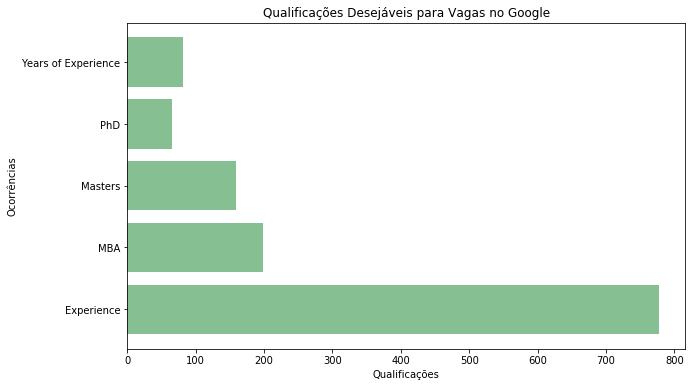

In [113]:
# Plotagem das informações
plt.figure(figsize = (10,6))
plt.barh(y="Qualificação Desejável", width ="Ocorrências" ,  data=preferred, color='#86bf91')
plt.title("Qualificações Desejáveis para Vagas no Google")
plt.xlabel('Qualificações')
plt.ylabel('Ocorrências')

## <b>Quais skills de programação são mais pedidas nas vagas do google?

In [114]:
# Como já se tem uma ideia de quais são as linguagems de programação mais utilizadas, 
# criei uma lista com algumas
values = ['Java','Python','PHP', 'SQL', 'C#']

In [115]:
# Buscando nas qualificações mínimas a ocorrência dessas palavras
prog_list= [google['Minimum Qualifications'].str.contains("Java").sum(),
            google['Minimum Qualifications'].str.contains("Python").sum(),
            google['Minimum Qualifications'].str.contains("PHP").sum(),
            google['Minimum Qualifications'].str.contains("SQL").sum(),
            google['Minimum Qualifications'].str.contains("C#").sum()
           ]

In [116]:
prog_list2= [google['Preferred Qualifications'].str.contains("Java").sum(),
            google['Preferred Qualifications'].str.contains("Python").sum(),
            google['Preferred Qualifications'].str.contains("PHP").sum(),
            google['Preferred Qualifications'].str.contains("SQL").sum(),
            google['Preferred Qualifications'].str.contains("C#").sum()
           ]

In [117]:
# Criando um dataset cujos índices são as informações da lista de linguagens de programação
prog = pd.DataFrame(index=values)

In [118]:
# Adicionando uma nova coluna ao data set com o conteúdo da prog_list
prog['Skills (Minimum Qualifications)'] = prog_list

In [119]:
# Adicionando uma nova coluna ao data set com o conteúdo da prog_list2
prog['Skills (Preferred Qualifications)'] = prog_list2

In [120]:
# Visualizando o daatset completo
prog

,Skills (Minimum Qualifications),Skills (Preferred Qualifications)
Java,97,80
Python,96,72
PHP,7,21
SQL,69,73
C#,15,5


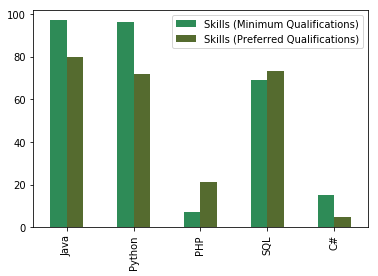

In [121]:
# Plotando as informações
prog.plot.bar(color = ['SeaGreen', 'DarkOliveGreen'])